In [260]:
import pandas as pd

bank = pd.read_csv('bank.csv')
print(bank.shape)
bank.head()


# education 교육상태                     #loan 대출여부
# housing 주택담보대출여부
# 캠페인 실행여부
# pday 캠패인 후 결과한시간
#이전접촉수
#poutcom 지난 캠패인의 성공 여부
#y는 최종 예금신청여부

(7234, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [261]:
bank.info()
# 머신러닝은 인티저만 인식을 함
# 결측치 처리가 매우 중요,  게다가 상황에 따라 다른 내용으로 결측치를 채워야함...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


- 각 컬럼마다 결측치를 몇개를 가지고 있는지 확인

In [262]:
bank.isnull().sum()

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [263]:
bank.isnull().sum(axis=1)         # axis=1 은    행마다(고객마다) 정리하는 방법

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64

In [264]:
bank.isnull().sum(axis=1).sort_values(ascending=False)         # axis=1 은    행마다(고객마다) 정리하는 방법

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64

In [265]:
bank.describe(include = [object])                              # 오브젝트만 보겠음

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


### 결측치처리
- 결측치가 얼마 없으면 채우는게 좋기는 함.
- 그리고 결측치가 미치는 영향을 고려하여 채울지, 없앨지 등을 결정함

In [266]:
import seaborn as sns

In [267]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17,8

<AxesSubplot:xlabel='job', ylabel='count'>

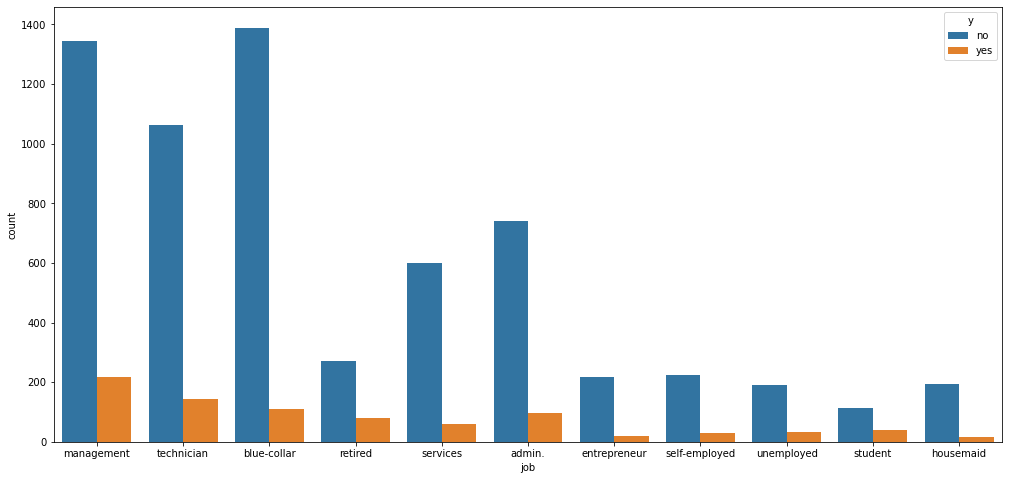

In [268]:
sns.countplot(data=bank, x='job', hue='y')

In [269]:
bank[bank.job.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
139,37,NaN,single,NaN,no,414,yes,no,NaN,7,may,131,1,-1,0,NaN,no
420,58,NaN,divorced,secondary,no,3111,yes,no,NaN,13,may,166,2,-1,0,NaN,no
441,53,NaN,divorced,tertiary,no,2272,yes,no,NaN,14,may,243,1,-1,0,NaN,no
985,37,NaN,single,secondary,no,57,yes,no,NaN,27,may,142,1,-1,0,NaN,no
1049,32,NaN,single,secondary,no,-274,no,yes,NaN,27,may,108,3,-1,0,NaN,no
1421,55,NaN,married,tertiary,no,0,no,no,NaN,5,jun,38,1,-1,0,NaN,no
1431,52,NaN,married,primary,no,8251,no,no,NaN,5,jun,397,1,-1,0,NaN,no
1451,39,NaN,single,secondary,no,914,no,no,NaN,5,jun,20,1,-1,0,NaN,no
1469,39,NaN,married,secondary,no,1701,no,no,NaN,6,jun,140,1,-1,0,NaN,no
1596,45,NaN,married,primary,no,44,no,no,NaN,11,jun,81,1,-1,0,NaN,no


In [270]:
bank[bank.job=='management'].balance.mean()

1722.8852564102565

In [271]:
bank[bank.job=='blue-collar'].balance.mean()

1097.714476317545

In [272]:
bank.balance.mean()

1374.9129112524192

> **Q. 계좌평균잔고가 1375불 이하면 블루칼라,  아니면 매니지먼트로 직업을 채워주세요 

In [273]:
bank.loc[(bank.job.isnull())&(bank.balance <=1375), 'job'] = "blue-collar"
bank.loc[(bank.job.isnull())&(bank.balance >1375), 'job'] = "management"

In [274]:
bank[bank.job.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [275]:
bank.loc[139]

age                   37
job          blue-collar
marital           single
education            NaN
default               no
balance              414
housing              yes
loan                  no
contact              NaN
day                    7
month                may
duration             131
campaign               1
pdays                 -1
previous               0
poutcome             NaN
y                     no
Name: 139, dtype: object

<AxesSubplot:xlabel='education', ylabel='count'>

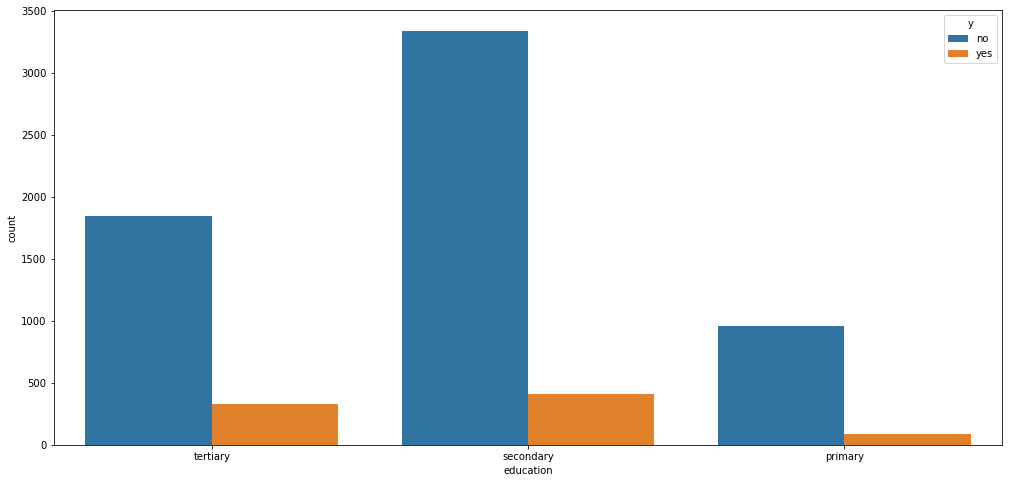

In [276]:
sns.countplot(data=bank, x='education', hue='y')

In [277]:
bank.education.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [278]:
bank[bank.education =='tertiary'].job.value_counts(ascending=False)

management       1315
technician        311
self-employed     128
entrepreneur      109
admin.             92
unemployed         52
retired            50
student            37
housemaid          33
blue-collar        29
services           22
Name: job, dtype: int64

In [279]:
bank.education.value_counts()

secondary    3745
tertiary     2178
primary      1038
Name: education, dtype: int64

In [280]:
bank[bank.education =='secondary'].job.value_counts(ascending=False)

blue-collar      856
technician       831
admin.           696
services         567
management       185
retired          153
unemployed       124
self-employed     95
student           89
entrepreneur      87
housemaid         62
Name: job, dtype: int64

In [281]:
bank[bank.education =='primary'].job.value_counts(ascending=False)

blue-collar      558
retired          129
housemaid        104
services          52
management        43
unemployed        42
entrepreneur      31
admin.            29
self-employed     27
technician        21
student            2
Name: job, dtype: int64

In [282]:
bank.loc[(bank.education.isnull())&(bank.job=='management'), 'education']= 'tertiary'

In [283]:
bank.loc[(bank.education.isnull())&(bank.job=='blue-collar'), 'education']= 'secondary'

In [284]:
bank[bank.education.isnull()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,56,technician,divorced,NaN,no,56,yes,no,NaN,5,may,439,1,-1,0,NaN,no
29,43,technician,divorced,NaN,no,205,yes,no,NaN,5,may,1419,1,-1,0,NaN,no
38,54,technician,single,NaN,no,447,yes,no,NaN,5,may,742,2,-1,0,NaN,no
45,57,technician,married,NaN,no,206,yes,no,NaN,5,may,216,3,-1,0,NaN,no
73,47,self-employed,married,NaN,no,935,yes,no,NaN,6,may,225,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,32,student,single,NaN,no,0,no,no,NaN,15,sep,7,1,-1,0,NaN,no
7171,20,student,single,NaN,no,179,no,no,cellular,23,sep,317,1,182,6,failure,no
7180,28,admin.,single,NaN,no,174,no,no,cellular,28,sep,184,1,-1,0,NaN,no
7191,32,technician,single,NaN,no,491,no,no,cellular,8,oct,251,2,91,7,success,yes


In [285]:
bank[bank.housing =='yes'].education.value_counts()

secondary    2340
tertiary     1058
primary       590
Name: education, dtype: int64

* 대졸과 대졸이 아닌 사람의 평균 잔고가 다를까

In [286]:
bank[bank.education == 'tertiary'].balance.mean()

1746.9426118391325

In [287]:
bank[bank.education != 'tertiary'].balance.mean()

1210.941246763593

In [288]:
bank.balance.mean()

1374.9129112524192

In [289]:
# 잔고 1500이상이면 tertiary로 수정해보기로 함
bank.loc[(bank.education.isnull()) & (bank.balance >=1500), 'education'] = 'tertiary'

In [290]:
bank.loc[(bank.education.isnull())& (bank.balance <1500), 'education'] = 'secondary'

In [291]:
bank.contact.value_counts()

cellular     4697
telephone     499
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact', ylabel='count'>

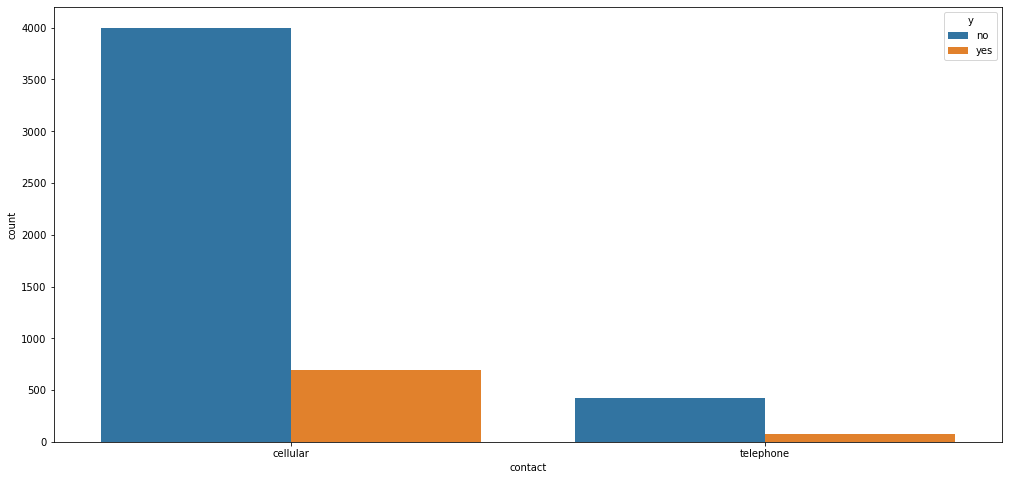

In [292]:
sns.countplot(data=bank, x = 'contact', hue='y')

In [293]:
bank.loc[bank.contact.isnull(), 'contact2'] = 0
bank.loc[bank.contact.notnull(), 'contact2'] = 1

<AxesSubplot:xlabel='contact2', ylabel='count'>

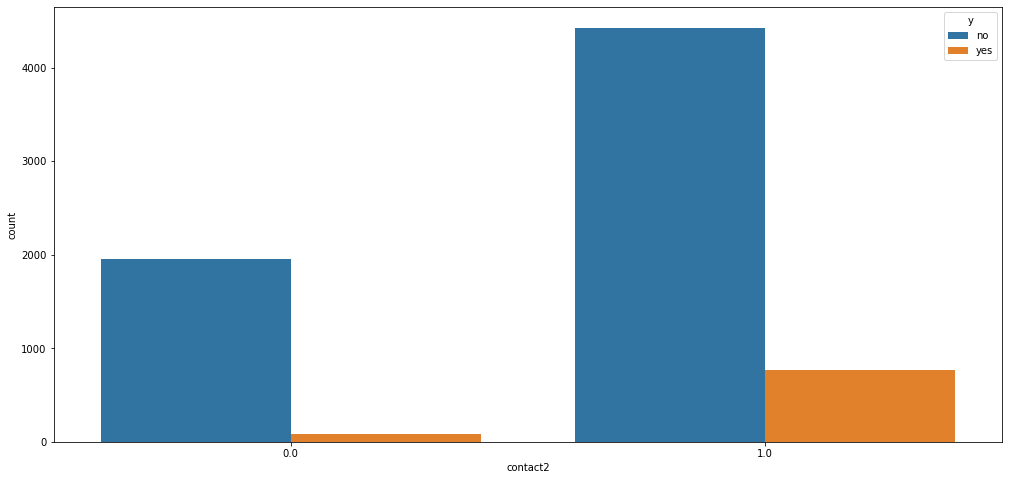

In [294]:
sns.countplot(data=bank, x='contact2', hue='y')

In [295]:
bank.age.describe()

count    7234.000000
mean       40.834808
std        10.706442
min         2.000000
25%        33.000000
50%        39.000000
75%        48.000000
max       157.000000
Name: age, dtype: float64

In [296]:
bank = bank[bank.age >=18]

In [297]:
bank = bank[bank.age <110]

In [298]:
bank.shape

(7232, 18)

In [299]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,contact2
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,0.0
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no,0.0
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no,0.0
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no,0.0
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no,0.0


In [300]:
bank = bank.replace('yes',1)
bank = bank.replace('no',0)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,contact2
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0,0.0
1,36,technician,single,secondary,0,265,1,1,NaN,5,may,348,1,-1,0,NaN,0,0.0
2,25,blue-collar,married,secondary,0,-7,1,0,NaN,5,may,365,1,-1,0,NaN,0,0.0
3,53,technician,married,secondary,0,-3,0,0,NaN,5,may,1666,1,-1,0,NaN,0,0.0
4,24,technician,single,secondary,0,-103,1,1,NaN,5,may,145,1,-1,0,NaN,0,0.0


# one-hot-encoding 은   컬럼이 3개 이상일 경우 진행함.   **** 매우 중요함 ***
# .get.dummies 함수

In [301]:
job = pd.get_dummies(bank.job)
job

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7229,0,0,0,0,0,0,0,1,0,0,0
7230,0,0,0,0,0,0,1,0,0,0,0
7231,0,0,0,0,1,0,0,0,0,0,0
7232,0,0,0,0,1,0,0,0,0,0,0


In [302]:
# 데이터 프레임간 붙임.  (가로로 붙일지, 세로로 붙일지 중요)
bank = pd.concat([bank, job], axis = 1)

In [303]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,management,married,tertiary,0,2143,1,0,NaN,5,...,0,0,0,1,0,0,0,0,0,0
1,36,technician,single,secondary,0,265,1,1,NaN,5,...,0,0,0,0,0,0,0,0,1,0
2,25,blue-collar,married,secondary,0,-7,1,0,NaN,5,...,1,0,0,0,0,0,0,0,0,0
3,53,technician,married,secondary,0,-3,0,0,NaN,5,...,0,0,0,0,0,0,0,0,1,0
4,24,technician,single,secondary,0,-103,1,1,NaN,5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,25,services,single,secondary,0,199,0,0,cellular,16,...,0,0,0,0,0,0,1,0,0,0
7230,28,self-employed,single,tertiary,0,159,0,0,cellular,16,...,0,0,0,0,0,1,0,0,0,0
7231,59,management,married,tertiary,0,138,1,1,cellular,16,...,0,0,0,1,0,0,0,0,0,0
7232,37,management,married,tertiary,0,1428,0,0,cellular,16,...,0,0,0,1,0,0,0,0,0,0


> ** Q. Marytal 컬럼을 원핫인코딩해주세요

In [304]:
bank.marital.value_counts()

married     4342
single      2059
divorced     831
Name: marital, dtype: int64

In [305]:
marry = pd.get_dummies(bank.marital)
bank = pd.concat([bank,marry], axis=1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,58,management,married,tertiary,0,2143,1,0,NaN,5,...,1,0,0,0,0,0,0,0,1,0
1,36,technician,single,secondary,0,265,1,1,NaN,5,...,0,0,0,0,0,1,0,0,0,1
2,25,blue-collar,married,secondary,0,-7,1,0,NaN,5,...,0,0,0,0,0,0,0,0,1,0
3,53,technician,married,secondary,0,-3,0,0,NaN,5,...,0,0,0,0,0,1,0,0,1,0
4,24,technician,single,secondary,0,-103,1,1,NaN,5,...,0,0,0,0,0,1,0,0,0,1


In [306]:
bank.corr()     # 상관계수


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
age,1.000000,-0.015191,0.112870,-0.183734,-0.025554,-0.014612,0.002302,-0.008063,-0.012571,0.001593,...,-0.008036,0.437614,-0.002890,-0.073207,-0.190647,-0.059957,0.008083,0.160652,0.281680,-0.419269
default,-0.015191,1.000000,-0.068625,-0.009522,0.074166,0.032564,-0.006449,0.039682,-0.039524,-0.032867,...,0.009965,-0.016547,0.012765,-0.000558,-0.020123,-0.006016,0.017258,0.011997,-0.005991,-0.001975
balance,0.112870,-0.068625,1.000000,-0.055845,-0.088751,0.011440,0.009217,-0.024560,0.008968,0.018815,...,0.065339,0.059554,0.019119,-0.036299,0.020720,-0.020396,0.014034,-0.026269,0.040143,-0.025008
housing,-0.183734,-0.009522,-0.055845,1.000000,0.023424,-0.022704,-0.007386,-0.035448,0.137812,0.045020,...,-0.074522,-0.159288,-0.023484,0.088257,-0.080948,-0.020461,-0.050072,-0.008788,0.034601,-0.031346
loan,-0.025554,0.074166,-0.088751,0.023424,1.000000,0.026820,-0.013759,0.018657,-0.025497,-0.020216,...,-0.043399,-0.015191,-0.002735,0.036829,-0.054077,0.003252,-0.039158,0.019782,0.038163,-0.055402
day,-0.014612,0.032564,0.011440,-0.022704,0.026820,1.000000,-0.031543,0.166819,-0.100747,-0.074033,...,-0.014697,-0.015287,0.001982,-0.019933,-0.004120,0.051358,-0.033252,-0.014111,0.017950,-0.009511
duration,0.002302,-0.006449,0.009217,-0.007386,-0.013759,-0.031543,1.000000,-0.080227,0.007992,-0.010421,...,-0.002963,0.015641,0.008810,-0.013209,-0.001613,0.012775,0.012861,0.009009,-0.031962,0.028326
campaign,-0.008063,0.039682,-0.024560,-0.035448,0.018657,0.166819,-0.080227,1.000000,-0.099078,-0.051053,...,0.010792,-0.035924,0.003571,-0.027964,-0.024226,0.022257,-0.016407,-0.017476,0.033417,-0.023921
pdays,-0.012571,-0.039524,0.008968,0.137812,-0.025497,-0.100747,0.007992,-0.099078,1.000000,0.552244,...,-0.018486,0.010097,-0.015986,0.006694,0.029349,-0.011977,0.004722,-0.017508,-0.019146,0.033154
previous,0.001593,-0.032867,0.018815,0.045020,-0.020216,-0.074033,-0.010421,-0.051053,0.552244,1.000000,...,-0.004721,0.022669,-0.002427,-0.012405,0.053902,-0.004412,-0.005802,-0.028845,-0.003864,0.024579


<AxesSubplot:>

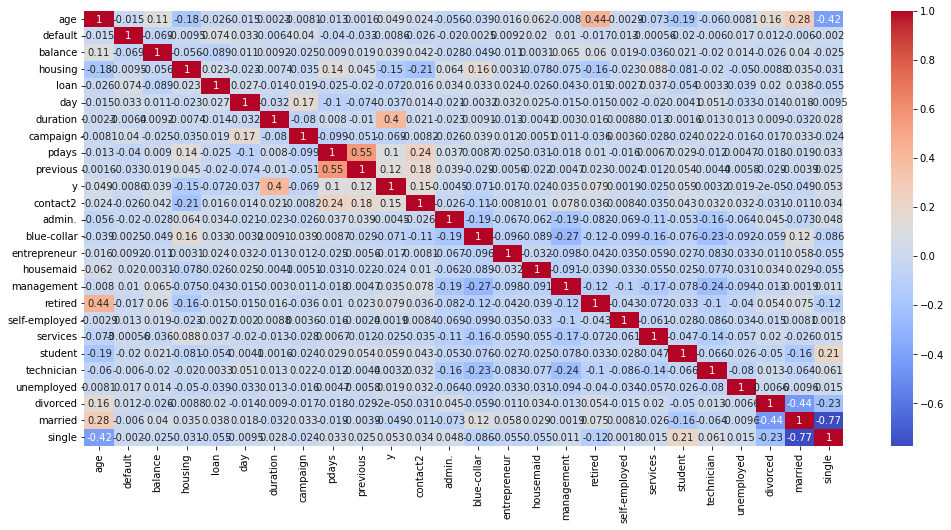

In [307]:
sns.heatmap(bank.corr(), annot=True, cmap = 'coolwarm')

In [308]:
bank.corrwith(bank.y).sort_values()              # - 음의 상관관계인지?,   + 양의 상관관계인지    즉, 같은방향인지 아닌지....

housing         -0.145463
loan            -0.071951
blue-collar     -0.071220
campaign        -0.068816
married         -0.049126
day             -0.036953
services        -0.025235
housemaid       -0.024452
entrepreneur    -0.017242
default         -0.008574
admin.          -0.004521
divorced        -0.000020
self-employed    0.001868
technician       0.003168
unemployed       0.019089
management       0.035294
balance          0.039057
age              0.048892
single           0.053336
student          0.059444
retired          0.079000
pdays            0.104820
previous         0.121929
contact2         0.147882
duration         0.402987
y                1.000000
dtype: float64

In [309]:
# 이 다음 문제는  데이터의 불균형,   y값.     해결방안은   언더샘플링 방법과  오버샘플링 방법이 있음
# 언더샘플링은 소수에 대한 학습
# 오버샘플링은 계속적으로 복사해나갈때

In [310]:
bank.y.value_counts()

0    6379
1     853
Name: y, dtype: int64

In [311]:
!pip install imbalanced-learn

* 언더샘플링

In [312]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'contact2', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'divorced',
       'married', 'single'],
      dtype='object')

In [328]:
bank_new = bank[['age', 'default', 'balance', 'housing',
       'loan', 'day',  'duration', 'campaign', 'pdays',
       'previous',  'y', 'contact2', 'blue-collar',
       'management', 'retired',
        'unemployed', 'divorced',
       'married', 'single']]

In [314]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [315]:
X = bank_new.drop('y', axis=1)
y = bank_new.y

# X는 설명변수,  Y는 목적변수

In [316]:
import numpy as np

In [317]:
np.sum(y==1), np.sum(y==0)

(853, 6379)

In [318]:
sampler = RandomUnderSampler(random_state=31)

In [319]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,contact2,blue-collar,management,retired,unemployed,divorced,married,single
0,58,0,2143,1,0,5,261,1,-1,0,0.0,0,1,0,0,0,1,0
1,36,0,265,1,1,5,348,1,-1,0,0.0,0,0,0,0,0,0,1
2,25,0,-7,1,0,5,365,1,-1,0,0.0,1,0,0,0,0,1,0
3,53,0,-3,0,0,5,1666,1,-1,0,0.0,0,0,0,0,0,1,0
4,24,0,-103,1,1,5,145,1,-1,0,0.0,0,0,0,0,0,0,1


In [320]:
X, y = sampler.fit_resample(X, y)

In [321]:
sampler = RandomOverSampler(random_state=31)

In [322]:
X, y = sampler.fit_resample(X, y)

In [323]:
np.sum(y==1), np.sum(y==0)

(853, 853)

### 범위변환 - 정규화
- MinMaxScaler : 변수의 최소값과 최대값 1로 했을 때 모든값이 0-1사이에 
- Z변환 : 정규화한 결과의 평균값이 0이되고 표준편차가 1이 되도록 표준화

In [324]:
from sklearn.preprocessing import MinMaxScaler

In [325]:
bank_new = bank.drop('y', axis = 1)

In [330]:
bank_new = bank[['age', 'default', 'balance', 'housing',
       'loan', 'day',  'duration', 'campaign', 'pdays',
       'previous',  'y', 'contact2', 'blue-collar',
       'management', 'retired',
        'unemployed', 'divorced',
       'married', 'single']]

scaler = MinMaxScaler()
scaler.fit(bank_new)

MinMaxScaler()

In [331]:
bank_new = pd.DataFrame(scaler.transform(bank_new), columns=bank_new.columns)
bank_new

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,contact2,blue-collar,management,retired,unemployed,divorced,married,single
0,0.533333,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.000000,0.000000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.240000,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.093333,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.000000,0.000000,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.466667,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.080000,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,0.093333,0.0,0.041554,0.0,0.0,0.500000,0.051396,0.000000,0.109283,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7228,0.133333,0.0,0.041080,0.0,0.0,0.500000,0.133393,0.023256,0.039953,0.100,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7229,0.546667,0.0,0.040832,1.0,1.0,0.500000,0.048128,0.023256,0.220917,0.125,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7230,0.253333,0.0,0.056095,0.0,0.0,0.500000,0.098930,0.023256,0.000000,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [333]:
bank_new.y

0      -0.365677
1      -0.365677
2      -0.365677
3      -0.365677
4      -0.365677
          ...   
7227   -0.365677
7228    2.734650
7229   -0.365677
7230   -0.365677
7231    2.734650
Name: y, Length: 7232, dtype: float64

In [332]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(bank_new)

bank_new = pd.DataFrame(scaler.transform(bank_new), columns=bank_new.columns)
bank_new

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,contact2,blue-collar,management,retired,unemployed,divorced,married,single
0,1.618860,-0.136876,0.253172,0.884894,-0.438876,-1.278901,-0.006694,-0.574414,-0.416253,-0.310155,-0.365677,-1.597518,-0.516714,1.893653,-0.225854,-0.178371,-0.36031,0.815838,-0.630895
1,-0.454682,-0.136876,-0.365799,0.884894,2.278548,-1.278901,0.316981,-0.574414,-0.416253,-0.310155,-0.365677,-1.597518,-0.516714,-0.528080,-0.225854,-0.178371,-0.36031,-1.225733,1.585050
2,-1.491453,-0.136876,-0.455448,0.884894,-0.438876,-1.278901,0.380228,-0.574414,-0.416253,-0.310155,-0.365677,-1.597518,1.935305,-0.528080,-0.225854,-0.178371,-0.36031,0.815838,-0.630895
3,1.147601,-0.136876,-0.454129,-1.130079,-0.438876,-1.278901,5.220483,-0.574414,-0.416253,-0.310155,-0.365677,-1.597518,-0.516714,-0.528080,-0.225854,-0.178371,-0.36031,0.815838,-0.630895
4,-1.585705,-0.136876,-0.487088,0.884894,2.278548,-1.278901,-0.438262,-0.574414,-0.416253,-0.310155,-0.365677,-1.597518,-0.516714,-0.528080,-0.225854,-0.178371,-0.36031,-1.225733,1.585050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227,-1.491453,-0.136876,-0.387552,-1.130079,-0.438876,0.045138,-0.334091,-0.574414,0.521318,2.429268,-0.365677,0.625971,-0.516714,-0.528080,-0.225854,-0.178371,-0.36031,-1.225733,1.585050
7228,-1.208698,-0.136876,-0.400736,-1.130079,-0.438876,0.045138,0.692743,-0.239266,-0.073485,1.881384,2.734650,0.625971,-0.516714,-0.528080,-0.225854,-0.178371,-0.36031,-1.225733,1.585050
7229,1.713112,-0.136876,-0.407657,0.884894,2.278548,0.045138,-0.375015,-0.239266,1.479052,2.429268,-0.365677,0.625971,-0.516714,1.893653,-0.225854,-0.178371,-0.36031,0.815838,-0.630895
7230,-0.360430,-0.136876,0.017515,-1.130079,-0.438876,0.045138,0.261175,-0.239266,-0.416253,-0.310155,-0.365677,0.625971,-0.516714,1.893653,-0.225854,-0.178371,-0.36031,0.815838,-0.630895


In [334]:
bank_new.corrwith(bank.y).sort_values()

housing       -0.133745
campaign      -0.068201
blue-collar   -0.061406
loan          -0.048535
day           -0.037096
divorced      -0.029492
married       -0.015373
default       -0.011726
unemployed     0.019158
management     0.024061
balance        0.032512
single         0.037532
duration       0.041117
age            0.044397
retired        0.073128
pdays          0.102307
previous       0.118336
contact2       0.136133
y              0.201442
dtype: float64